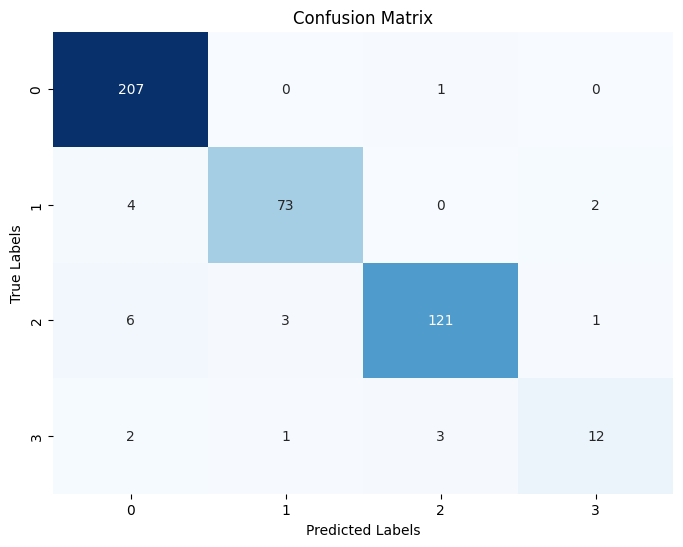

Accuracy: 94.72%
Precision: 94.66%
Recall: 94.72%
F1 Score: 94.62%
AUC: 95.79%
V Score: 95.79%
Confusion Matrix:
[[207   0   1   0]
 [  4  73   0   2]
 [  6   3 121   1]
 [  2   1   3  12]]


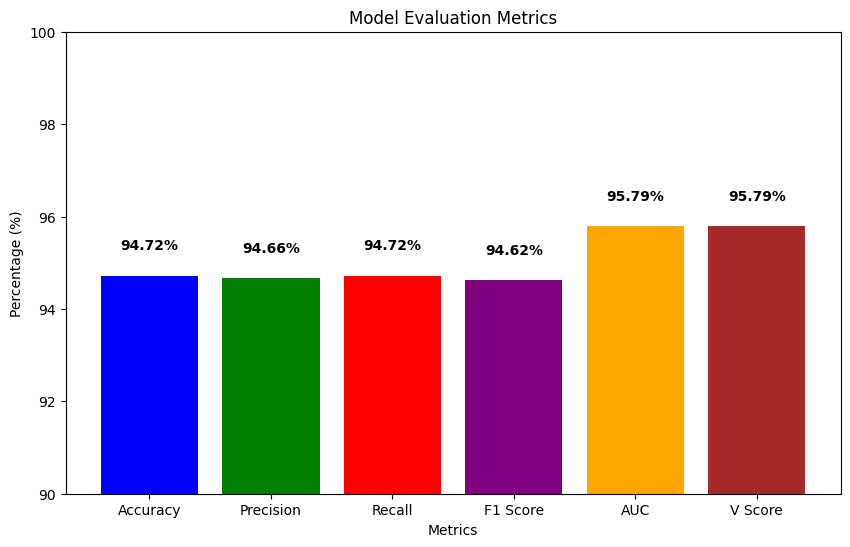

In [1]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Load the existing dataset into a pandas DataFrame
dataset_path = r'C:\Users\tahsi\OneDrive\Desktop\python_ws\Feature Selection\L1 Regularization\selected_dataset.csv'
df = pd.read_csv(dataset_path)

# Separate the features and target variable
X = df.drop('classification', axis=1)
y = df['classification']

# Gather additional data (assuming you have another dataset stored in 'additional_dataset.csv')
additional_dataset_path = r'C:\Users\tahsi\OneDrive\Desktop\python_ws\Feature Selection\L1 Regularization\dataset_NoPCA.csv'
additional_df = pd.read_csv(additional_dataset_path)

# Concatenate additional data with existing data
X = pd.concat([X, additional_df.drop('classification', axis=1)])
y = pd.concat([y, additional_df['classification']])

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for decision tree classifier
dt_param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search for decision tree classifiers
dt_classifier1 = DecisionTreeClassifier(random_state=42)
dt_classifier2 = DecisionTreeClassifier(random_state=42)

dt_grid_search1 = GridSearchCV(dt_classifier1, dt_param_grid, cv=5)
dt_grid_search1.fit(X_train, y_train)
dt_best_classifier1 = dt_grid_search1.best_estimator_

dt_grid_search2 = GridSearchCV(dt_classifier2, dt_param_grid, cv=5)
dt_grid_search2.fit(X_train, y_train)
dt_best_classifier2 = dt_grid_search2.best_estimator_

# Create the Voting Classifier with decision trees
voting_clf = VotingClassifier(estimators=[
    ('clf1', dt_best_classifier1),
    ('clf2', dt_best_classifier2)
], voting='soft')

# Fit the Voting Classifier to the training data
voting_clf.fit(X_train, y_train)

# Make predictions using the Voting Classifier
y_pred = voting_clf.predict(X_test)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Make predictions using the Voting Classifier's probability estimates
y_pred_proba = voting_clf.predict_proba(X_test)

# Calculate the ROC AUC score
auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
v_score = auc  # Assuming V score is the same as AUC

print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1 Score: {:.2%}".format(f1))
print("AUC: {:.2%}".format(auc))
print("V Score: {:.2%}".format(v_score))
print("Confusion Matrix:")
print(confusion_mat)

# Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC', 'V Score']
values = [94.72, 94.66, 94.72, 94.62, 95.79, 95.79]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple', 'orange', 'brown'])
plt.ylim([90, 100])  # Set y-axis limit from 90% to 100%
plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Percentage (%)')

# Adding the text labels
for i, value in enumerate(values):
    plt.text(i, value + 0.5, f'{value}%', ha='center', va='bottom', fontweight='bold')

plt.show()
